# 패키지 불러오기

In [1]:
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk

import re
import sys
import os
import time
import random
import pandas as pd
import numpy as np

C:\Users\Yooyeon\Anaconda35\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# 데이터 불러오기

In [2]:
train_data = pd.read_csv('data/korean_train.csv',encoding='utf-8', engine='python', index_col=0)
test_data = pd.read_csv('data/korean_test.csv', encoding='utf-8', engine='python',index_col=0)

In [7]:
len(train_data), len(test_data)

(12997, 700)

# 데이터 혼합하기

In [8]:
whole_data = pd.concat([train_data, test_data]).reset_index(drop=True)

# raw 데이터 확인

In [9]:
whole_data

,reviews,sentiment
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,원작의 긴장감을 제대로 살려내지못했다.,0
7,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,액션이 없는데도 재미 있는 몇안되는 영화,1
9,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


# 데이터 기호 및 문법 전처리

In [10]:
docs_tr = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in whole_data.reviews.values.tolist()]
docs_tr = [re.sub("\'", " ", x) for x in docs_tr]
docs_tr = [re.sub('\S*@\S*\s?', '', x) for x in docs_tr]
docs_tr = [re.sub('\s+', ' ', x) for x in docs_tr]
docs_tr = [re.sub('[^\w\s]','',x) for x in docs_tr]

# 기호 및 문법 전처리 된 데이터 확인

In [11]:
whole_data.reviews = docs_tr

In [12]:
whole_data

,reviews,sentiment
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화ㅋㅋㅋ별반개도 아까움,0
6,원작의 긴장감을 제대로 살려내지못했다,0
7,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,액션이 없는데도 재미 있는 몇안되는 영화,1
9,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


# 한나눔 형태소 분석 전처리 

In [13]:
hannanum = Hannanum()
docs_tr = [hannanum.morphs(review) for review in whole_data.reviews.values.tolist()]


# 한나눔 형태소 분석 전처리 확인

In [14]:
whole_data.reviews = docs_tr

In [15]:
whole_data

,reviews,sentiment
0,"[아, 더빙, 진짜, 짜증나, 네, 요, 목소리]",0
1,"[흠포스터보, 이, 고, 초딩영화줄오버연기조차, 가볍, 지, 않, 구나]",1
2,[너무재밓었다그래서보는것을추천한다],0
3,"[교도소, 이야기구먼, 솔직히, 재미, 는, 없다평점, 조정]",0
4,"[사이몬페그, 의, 익살, 스런, 연기, 가, 돋보이, 었던, 영화스파이더맨, 에서...",1
5,"[막, 걸음마, 떼, ㄴ, 3세, 부터, 초등학교, 1학년생, 이, ㄴ, 8살용영홬...",0
6,"[원작, 의, 긴장감, 을, 제대로, 살, 려, 내, 지, 못하, 었다]",0
7,"[별, 반개, 도, 아깝, 다, 욕나온다, 이응경, 길용우, 연기생활이몇년인지정말,...",0
8,"[액션, 이, 없, 는데, 도, 재미, 있, 는, 몇안되, 는, 영화]",1
9,"[왜케, 평점, 이, 낮, 은, 것, 이, ㄴ데, 꽤, 보, ㄹ, 만, 하, ㄴ데,...",1


# 데이터의 모든 토큰 결합

In [16]:
tokens = [tok for sublist in docs_tr for tok in sublist]

In [17]:
tokens

['아',
 '더빙',
 '진짜',
 '짜증나',
 '네',
 '요',
 '목소리',
 '흠포스터보',
 '이',
 '고',
 '초딩영화줄오버연기조차',
 '가볍',
 '지',
 '않',
 '구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소',
 '이야기구먼',
 '솔직히',
 '재미',
 '는',
 '없다평점',
 '조정',
 '사이몬페그',
 '의',
 '익살',
 '스런',
 '연기',
 '가',
 '돋보이',
 '었던',
 '영화스파이더맨',
 '에서',
 '늙',
 '어',
 '보이',
 '기',
 '만',
 '하',
 '었던',
 '커스틴',
 '던스트',
 '가',
 '너무나',
 '도',
 '이쁘',
 '어',
 '보이',
 '었다',
 '막',
 '걸음마',
 '떼',
 'ㄴ',
 '3세',
 '부터',
 '초등학교',
 '1학년생',
 '이',
 'ㄴ',
 '8살용영홬ㅋㅋ별반개',
 '도',
 '아까움',
 '원작',
 '의',
 '긴장감',
 '을',
 '제대로',
 '살',
 '려',
 '내',
 '지',
 '못하',
 '었다',
 '별',
 '반개',
 '도',
 '아깝',
 '다',
 '욕나온다',
 '이응경',
 '길용우',
 '연기생활이몇년인지정말',
 '발로해',
 '도',
 '그것보단',
 '낫겟다',
 '납치감금만반복반복이드라마',
 '는',
 '가족도',
 '없',
 '다',
 '연기못하는사람만모엿',
 '네',
 '액션',
 '이',
 '없',
 '는데',
 '도',
 '재미',
 '있',
 '는',
 '몇안되',
 '는',
 '영화',
 '왜케',
 '평점',
 '이',
 '낮',
 '은',
 '것',
 '이',
 'ㄴ데',
 '꽤',
 '보',
 'ㄹ',
 '만',
 '하',
 'ㄴ데',
 '헐리우드식',
 '화',
 '이',
 '리어',
 '하',
 'ㅁ',
 '에만',
 '너무',
 '길들이',
 '어',
 '지',
 '어',
 '있',
 '나',
 '걍인피니트가짱이다진짜짱',
 '이',
 '다',
 '보'

# nltk 객체 생성

In [18]:
text = nltk.Text(tokens)

# 중복을 제외한 토큰의 수 

In [19]:
print(len(set(text.tokens)))

28713


# 전체 문서에서 가장 많이 나온 토큰 10개 확인

In [20]:
print(text.vocab().most_common(10))

[('이', 12456), ('하', 5468), ('는', 4611), ('ㄴ', 4359), ('고', 3557), ('영화', 3261), ('가', 3182), ('어', 3047), ('의', 2978), ('보', 2950)]


# 전체 문서에서 가장 많이 나온 토큰 visualization

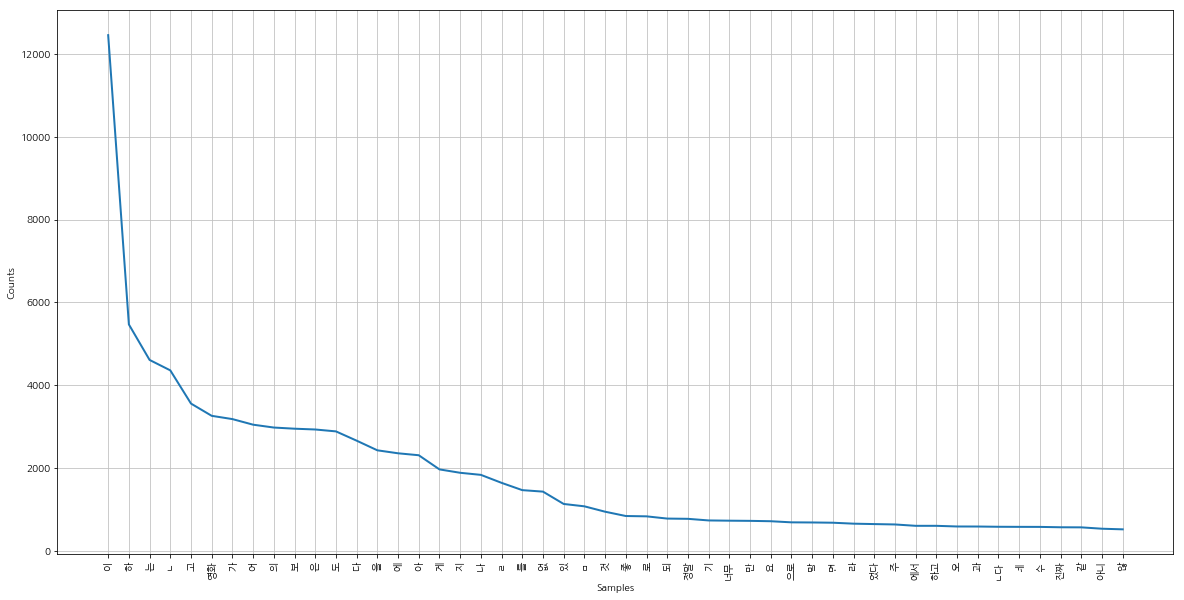

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

# Term document matrix 만들기


In [22]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

### train 데이터와 test 데이터 나누기

In [23]:
train_docs = whole_data.reviews.values.tolist()[:len(train_data)]
test_docs= whole_data.reviews.values.tolist()[-len(test_data):]

### train_docs 의 토큰을 결합

In [24]:
train_docs = [' '.join(doc) for doc in train_docs]

In [25]:
train_docs[0]

'아 더빙 진짜 짜증나 네 요 목소리'

### test_docs 의 토큰을 결합

In [26]:
test_docs = [' '.join(doc) for doc in test_docs]

In [27]:
test_docs[0]

'굳 ㅋ'

### train_x 에 대한 term document matrix 생성

In [28]:
train_x = vectorizer.fit_transform(train_docs)

### test_x matrix 생성

In [29]:
test_x = vectorizer.transform(test_docs)

### train_y와 test_y 생성

In [30]:
train_y = whole_data.sentiment.values.tolist()[:len(train_data)]
test_y = whole_data.sentiment.values.tolist()[-len(test_data):]

# 분류 모델 생성 및 분류 성능 구하기

### SVM rbf 모델 생성 및 예측 

In [31]:
classifier_rbf = svm.SVC()
classifier_rbf.fit(train_x, train_y)
prediction_rbf = classifier_rbf.predict(test_x)

### 정확도 계산 (accuracy score)

In [35]:
print(accuracy_score(test_y, prediction_rbf))

0.47285714285714286


### SVM linear 모델 생성 및 예측

In [36]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_x, train_y)
prediction_linear = classifier_linear.predict(test_x)

### 정확도 계산 (accuracy score)

In [39]:
print(accuracy_score(test_y, prediction_linear))

0.7314285714285714


### Random Forest 모델 생성 및 예측

In [41]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
predict_rf = rf.predict(test_x)

C:\Users\Yooyeon\Anaconda35\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 정확도 계산 (accuracy score)

In [42]:
print(accuracy_score(test_y, predict_rf))

0.6728571428571428


### Gradient Boosting 분류 모델 생성 및 예측

In [43]:
gb = GradientBoostingClassifier()
gb.fit(train_x, train_y)
predict_gb = gb.predict(test_x)

### 정확도 계산 (accuracy score)

In [44]:
print(accuracy_score(test_y, predict_gb))

0.6428571428571429
